In [1]:
import numpy as np
import basic
import cosmology
import misctools
import local
from matplotlib.pyplot import *

Using CAMB 1.3.2 installed at /global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/camb


In [2]:
import importlib
importlib.reload(local)

Using CAMB 1.3.2 installed at /global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/camb


<module 'local' from '/global/u1/t/toshiyan/Work/Ongoing/bispec/z-clean/local.py'>

In [3]:
lmin, lmax = 1, 2048
L = np.linspace(0,lmax,lmax+1)
kk_noise = 's4'

In [4]:
k, pk0 = np.loadtxt(local.root + 'modelw/Pk/Pklin_new.dat',unpack=True)

In [5]:
# source redshift
zs = [local.zcmb,local.zcmb,local.zcmb]
# mass spectra
ckk, ckI, cII, nlII = np.loadtxt(local.root+'modelw/cl/mass.dat',unpack=True,usecols=(1,2,3,4))
#fdel = ckI/(cII+nlII+1e-30)
fdel = ckI/(cII+1e-30)

In [6]:
zn = 100

In [7]:
zmin, zmax = 0.0001, 30
z, dz = basic.bispec.zpoints(zmin,zmax,zn)
chi = basic.cosmofuncs.dist_comoving(z,**local.cps)

In [8]:
# CIB weight
wcib = local.cib_weight(z,local.cps,local.nu)

In [9]:
# modified kernel
wdel = np.zeros((zn,lmax+1))
for l in range(lmax+1):
    if l<100: continue
    wdel[:,l] = fdel[l]*wcib

In [10]:
# clkk
kk = basic.bispec.cl_flat(local.cpmodel,z,dz,zs[:2],lmax,k,pk0)
kk_del = basic.bispec.cl_flat(local.cpmodel,z,dz,zs[:2],lmax,k,pk0,wdel=wdel)

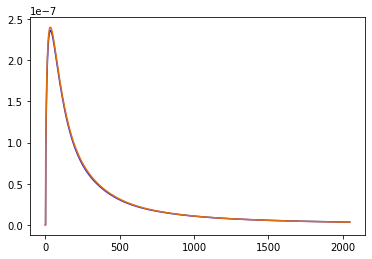

In [11]:
plot(kk)
plot(ckk)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


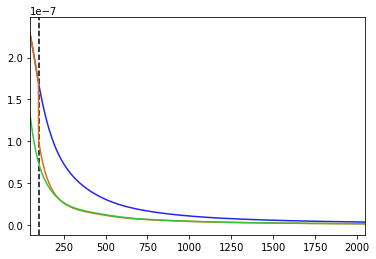

In [12]:
xlim(50,lmax)
axvline(100,color='k',ls='--')
plot(kk)
plot(kk_del)
rhosq = ckI**2/(ckk*(cII+1e-30))
plot(ckk*(1-rhosq))